## MCB 160L Lab 1 - Introduction to statistics
Jupyter is an interactive, web-based python interface. Jupyter is a great tool for data-science, since you can iteratively develop your project and debug your code without having to continually reload data into memory. To run each cell of the jupyter notebook, use  $\texttt{ctrl+enter}$. In addition to jupyter, three python packages are used in this notebook: numpy (to perform computations + sampling), pandas (to clean the data), and matplotlib (to plot the data) 


### Learning Objectives
- Use descriptive statistics to quantify the basic features of data
- Use bootstrapping to determine the probability of a given observation in a non-normal dataset
- Understand what a p-value means with respect to the tested hypothesis.


In [1]:
# Step 0: import python packages 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [7]:
# Step 1: Load in + clean the data

# load in data for the entire population
data = (pd.read_csv("oasis_cross-sectional.csv")
        .dropna(axis=0, subset=["CDR", "nWBV"])) # drop the participants without a clinical dementia rating

# isolate participants with nonzero clinical dementia rating
dementia_data = data.loc[data.CDR > 0, :]

# isolate general population (healthy participants)
healthy_data = data.loc[data.CDR == 0.0, :]

#print some of the data
print("Sample of dementia data:")
print(dementia_data.head(10), "\n")

print("Sample of healthy data:")
print(healthy_data.head(10), "\n")


Sample of dementia data:
               ID M/F Hand   Age  Educ  SES  MMSE  CDR    eTIV   nWBV    ASF
5   OAS1_0003_MR1   F    R  73.0   4.0  3.0  27.0  0.5  1454.0  0.708  1.207
27  OAS1_0015_MR1   M    R  76.0   2.0  NaN  28.0  0.5  1738.0  0.719  1.010
29  OAS1_0016_MR1   M    R  82.0   2.0  4.0  27.0  0.5  1477.0  0.739  1.188
39  OAS1_0021_MR1   F    R  80.0   3.0  3.0  23.0  0.5  1794.0  0.765  0.978
41  OAS1_0022_MR1   F    R  69.0   2.0  4.0  23.0  0.5  1447.0  0.757  1.213
43  OAS1_0023_MR1   M    R  82.0   2.0  3.0  27.0  0.5  1420.0  0.710  1.236
51  OAS1_0028_MR1   F    R  86.0   2.0  4.0  27.0  1.0  1449.0  0.738  1.211
57  OAS1_0031_MR1   M    R  88.0   1.0  4.0  26.0  1.0  1419.0  0.674  1.236
65  OAS1_0035_MR1   F    R  84.0   3.0  2.0  28.0  1.0  1402.0  0.695  1.252
71  OAS1_0039_MR1   M    R  70.0   4.0  3.0  29.0  0.5  1463.0  0.772  1.200 

Sample of healthy data:
               ID M/F Hand   Age  Educ  SES  MMSE  CDR    eTIV   nWBV    ASF
1   OAS1_0001_MR1   F    

We are only seeing the first 10 rows in each data set (that is what the .head(10) function does). Just looking at the data, which group seems to have the higher brain volume (nWBV)?



### Step 2: Basic descriptive statistics

Calculate the **mean** of the normalized whole-brain volume (nWBV) for healthy subjects. Apply the <code>mean</code> function to the column "nWBV" in the healthy_data and print the value. Note that the <code>.3f</code> in the print line tells Python to include only three places after the decimal point.

In [21]:
#Mean healthy patients (fill in the column name)

mean_healthy = healthy_data[...].mean()
print("Mean nWBV for the healthy population is %.3f" % (mean_healthy))

KeyError: Ellipsis

Calculate the **mean** normalized whole-brain volume for dementia patients following the same pattern as above.

In [ ]:
#Mean dementia patients

mean_dementia...
print...

Now calculate and print the **median** of the nWBV for the healthy and dementia patients. Hint: Copy what you did above, but replace "mean" with "median".

In [ ]:
# Median


Calculate and print the **standard deviation (std)** of the nWBV for the healthy and dementia patients

In [ ]:
#Standard deviation


Determine and print the **minimum value (min)** of the nWBV for the healthy and dementia patients

In [ ]:
# Minimum value


Determine and print the **maximum value (max)** of the nWBV for the healthy and dementia patients

In [ ]:
# Maximum value


Calculate and print the range of the nWBV values for healthy and dementia patients. Hint: Subtract your minimum value, which you determined before, from the maximum value. 

In [ ]:
# Range of values


What is the sample size for the healthy and dementia patients? You can use the length function <code>len()</code> like we did in the introductory notebooks, or you can use the function <code>.count</code> like we have been doing with the mean and median calculations. 

In [ ]:
# Sample size


Text(0, 0.5, 'Count')

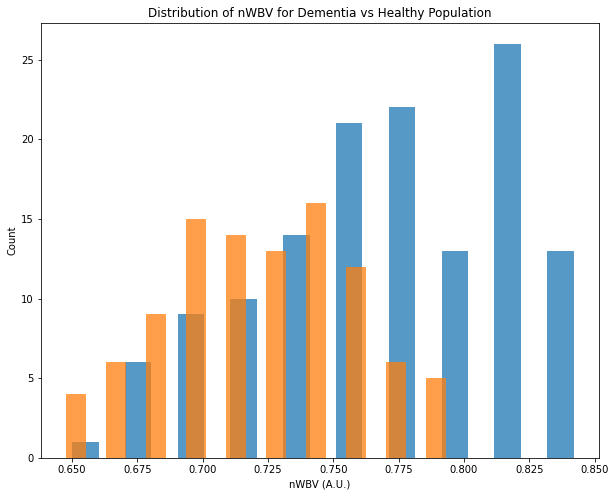

In [31]:
# Plot the data as a histogram (just run this cell)

fig, ax = plt.subplots(1, figsize=(10,8))
ax.hist(healthy_data["nWBV"].values, rwidth=0.5, alpha=0.75, bins=10)
ax.hist(dementia_data["nWBV"].values, rwidth=0.5, alpha=0.75, bins=10)

ax.set_title("Distribution of nWBV for Dementia vs Healthy Population")
ax.set_xlabel("nWBV (A.U.)")
ax.set_ylabel("Count")

### Step 3: Bootstrapping
Run the cells below to conduct a bootstrap analysis of the data. You will interpret the results in the lab assignment.

In [26]:
# In this cell, we will use a **for loop** to get the resamples and find the mean of each one. 
# We will resample 3000 times.

n_iter = 3000
n_samples = dementia_data.shape[0]
bootstrap_means = np.zeros([n_iter,])
for i in range(n_iter):
    # pull random sample
    sample_idx = np.random.choice(a=np.arange(0, data.shape[0]), size=n_samples, replace=True)
    bootstrap_means[i] = data["nWBV"].values[sample_idx].mean()

Mean nWBV for the entire population: 0.749


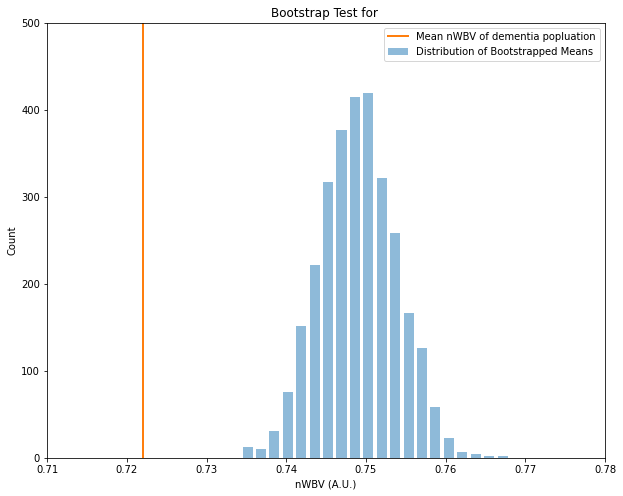

In [32]:
# mean nWBV of the entire population
print("Mean nWBV for the entire population: %.3f" % (data["nWBV"].mean()))

# plot the distribution of bootstrapped means in a histogram
fig, ax = plt.subplots(1, figsize=(10,8))
ax.hist(bootstrap_means, rwidth=0.75, alpha=0.5, bins=20,
        label="Distribution of Bootstrapped Means")
ax.set_xlabel("nWBV (A.U.)")
ax.set_xlim([0.71, 0.78])
ax.set_ylabel("Count")
ax.set_ylim([0, 500])

# plot a vertical line showing the mean nWBV of the dementia population
ax.plot(np.array([1, 1])*dementia_data["nWBV"].mean(), [0, 500], lw=2, label = "Mean nWBV of dementia popluation")
ax.set_title("Bootstrap Test for ")
ax.legend()



In [33]:
# calculate the p-value of the boostrap test

p_value = (np.sum(bootstrap_means <= dementia_data["nWBV"].mean()) /n_iter) + 1/n_samples
# The p-value is calculated as the proportion of bootstrapped nWBV means that fall below the 
# mean nWBV of the population of dementia patients. 
# We add 1/(sample size) to the p-value to account for uncertainty in the bootstrapping procedure. 

print("p-value of bootstrap test: %0.3f " % (p_value)) 

p-value of bootstrap test: 0.010 
